# Téléchargement des librairies

In [6]:
%pip install nltk spacy scikit-learn pandas wordcloud seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Téléchargement du modèle en anglais

In [7]:
!python -m spacy download en_core_web_md

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.7.1/en_core_web_md-3.7.1-py3-none-any.whl (42.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importation des libraries

In [8]:
# import de la librairie python
import pandas as pd
import numpy as np

# import sns
import seaborn as sns

import matplotlib.pyplot as plt

# Retirer les warnings
import warnings

In [9]:
# Machine Learning 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Chargement du fichier des fonctions

In [10]:
import sys
import os

# Ajouter le répertoire de base du projet au chemin de recherche
sys.path.append(os.path.abspath(os.path.join('..')))

# Importation des fonctions du module text.py
from functions_utils.text import *

# Processus de filtrage des mots

In [11]:
# Exemple de texte
text = "Today, I don't feel well, I have a headache and I have a sore throat."

nlp = spacy.load('en_core_web_md')

# Traitement du texte avec SpaCy
doc = nlp(text)

## Vérifier les mots inclus dans la prédiction

In [12]:
# Afficher les entités nommées
for entity in doc.ents:
    print(f'Entity: {entity.text}, Label: {entity.label_}')
    
# Afficher les entités nommées nominales
for chunk in doc.noun_chunks:
    print(f'Chunk: {chunk.text}, Root: {chunk.root.text}, Root POS: {chunk.root.pos_}')
    
# Afficher les tokens et leurs POS tags
for token in doc:
    print(f'Token: {token.text}, POS: {token.pos_}, Tag: {token.tag_}')
    
# Afficher les dépendances syntaxiques
for token in doc:
    print(f'Token: {token.text}, Dependency: {token.dep_}, Head text: {token.head.text}, Head POS: {token.head.pos_}')

Entity: Today, Label: DATE
Chunk: I, Root: I, Root POS: PRON
Chunk: I, Root: I, Root POS: PRON
Chunk: a headache, Root: headache, Root POS: NOUN
Chunk: I, Root: I, Root POS: PRON
Chunk: a sore throat, Root: throat, Root POS: NOUN
Token: Today, POS: NOUN, Tag: NN
Token: ,, POS: PUNCT, Tag: ,
Token: I, POS: PRON, Tag: PRP
Token: do, POS: AUX, Tag: VBP
Token: n't, POS: PART, Tag: RB
Token: feel, POS: VERB, Tag: VB
Token: well, POS: ADV, Tag: RB
Token: ,, POS: PUNCT, Tag: ,
Token: I, POS: PRON, Tag: PRP
Token: have, POS: VERB, Tag: VBP
Token: a, POS: DET, Tag: DT
Token: headache, POS: NOUN, Tag: NN
Token: and, POS: CCONJ, Tag: CC
Token: I, POS: PRON, Tag: PRP
Token: have, POS: VERB, Tag: VBP
Token: a, POS: DET, Tag: DT
Token: sore, POS: ADJ, Tag: JJ
Token: throat, POS: NOUN, Tag: NN
Token: ., POS: PUNCT, Tag: .
Token: Today, Dependency: npadvmod, Head text: feel, Head POS: VERB
Token: ,, Dependency: punct, Head text: feel, Head POS: VERB
Token: I, Dependency: nsubj, Head text: feel, Head P

In [13]:
# Afficher le texte nettoyé avec les mots retenu pour la prédiction
print(process_text(text))

headache sore throat


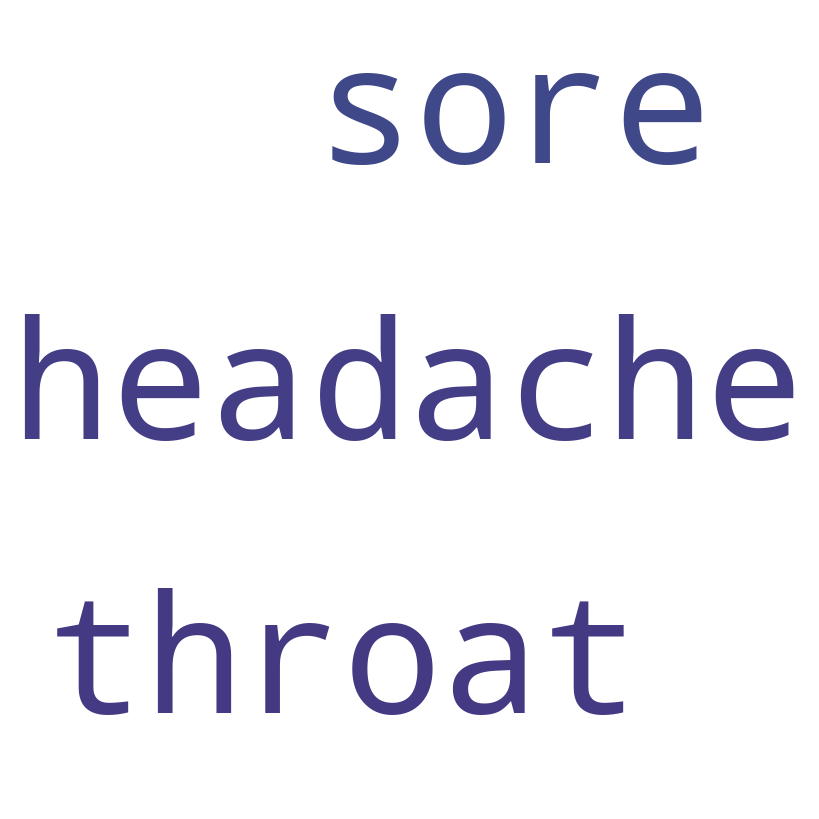

In [14]:
# Affichage du nuage de mots
text = process_text(text)
generate_wordcloud(text)

-----

# Préparation du modèle

In [15]:
# Désactiver les avertissements
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('../data/dataset.csv')
df = shuffle(df,random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,stomach bleeding,chest pain,chest pain,loss of smell,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [18]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


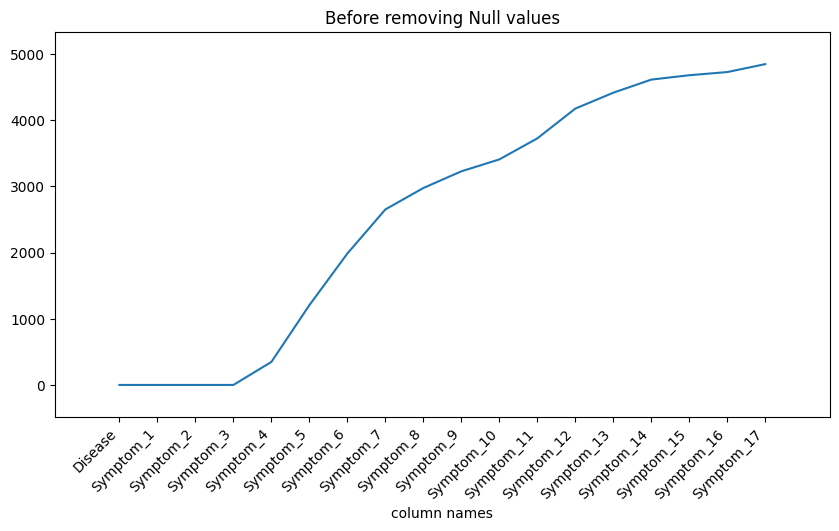

In [19]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [20]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin rash,pus filled pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0


In [22]:
df1 = pd.read_csv('../data/symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [23]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

In [24]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0


In [25]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,4,3,3,5,3,6,5,4,2,2,6,0,0,0,0,0,0
3,AIDS,3,6,7,5,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,1,5,3,5,4,4,4,0,0,0,0,0,0,0,0,0,0
5,Hypertension,3,7,4,4,3,0,0,0,0,0,0,0,0,0,0,0,0
6,Hypoglycemia,5,4,4,3,3,5,5,4,4,4,2,4,0,0,0,0,0
7,Arthritis,2,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Hepatitis B,1,4,2,3,4,4,4,4,4,6,5,2,0,0,0,0,0
9,Migraine,3,5,3,5,4,4,3,2,3,0,0,0,0,0,0,0,0


In [26]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


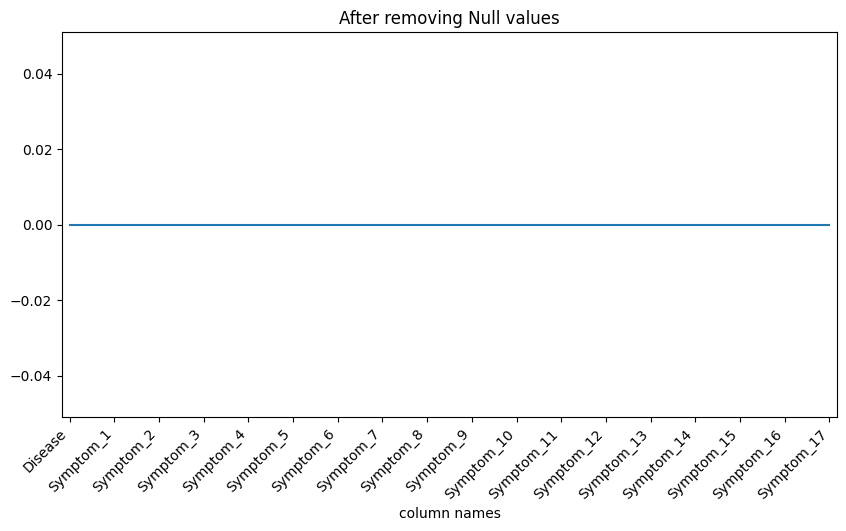

In [27]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [28]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


In [29]:
df['Disease'].unique()

array(['Acne', 'Hyperthyroidism', 'AIDS', 'Chronic cholestasis',
       'Hypertension', 'Hypoglycemia', 'Arthritis', 'Hepatitis B',
       'Migraine', 'Urinary tract infection', 'Diabetes', 'Hepatitis D',
       'Psoriasis', 'Alcoholic hepatitis', 'Dimorphic hemmorhoids(piles)',
       'Hepatitis E', 'Cervical spondylosis', 'Bronchial Asthma',
       'hepatitis A', 'Allergy', 'Hepatitis C', 'Pneumonia',
       'Hypothyroidism', 'Gastroenteritis', 'Varicose veins', 'Jaundice',
       'Drug Reaction', '(vertigo) Paroymsal  Positional Vertigo',
       'Heart attack', 'Tuberculosis', 'Typhoid', 'Common Cold',
       'Peptic ulcer diseae', 'Paralysis (brain hemorrhage)',
       'Fungal infection', 'Impetigo', 'GERD', 'Dengue', 'Malaria',
       'Chicken pox', 'Osteoarthristis'], dtype=object)

c:\Users\Pascal.Ke\Desktop\detection_maladie\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.907520325203252
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.88      0.83      0.86        18
                                   AIDS       0.74      1.00      0.85        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      0.83      0.91        29
                                Allergy       0.67      0.84      0.74        19
                              Arthritis       1.00      0.97      0.98        31
                       Bronchial Asthma       0.89      0.61      0.72        28
                   Cervical spondylosis       0.73      0.80      0.76        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       0.82      0.95      0.88        19
                            Common Cold       1.00      1.00      1.00        25

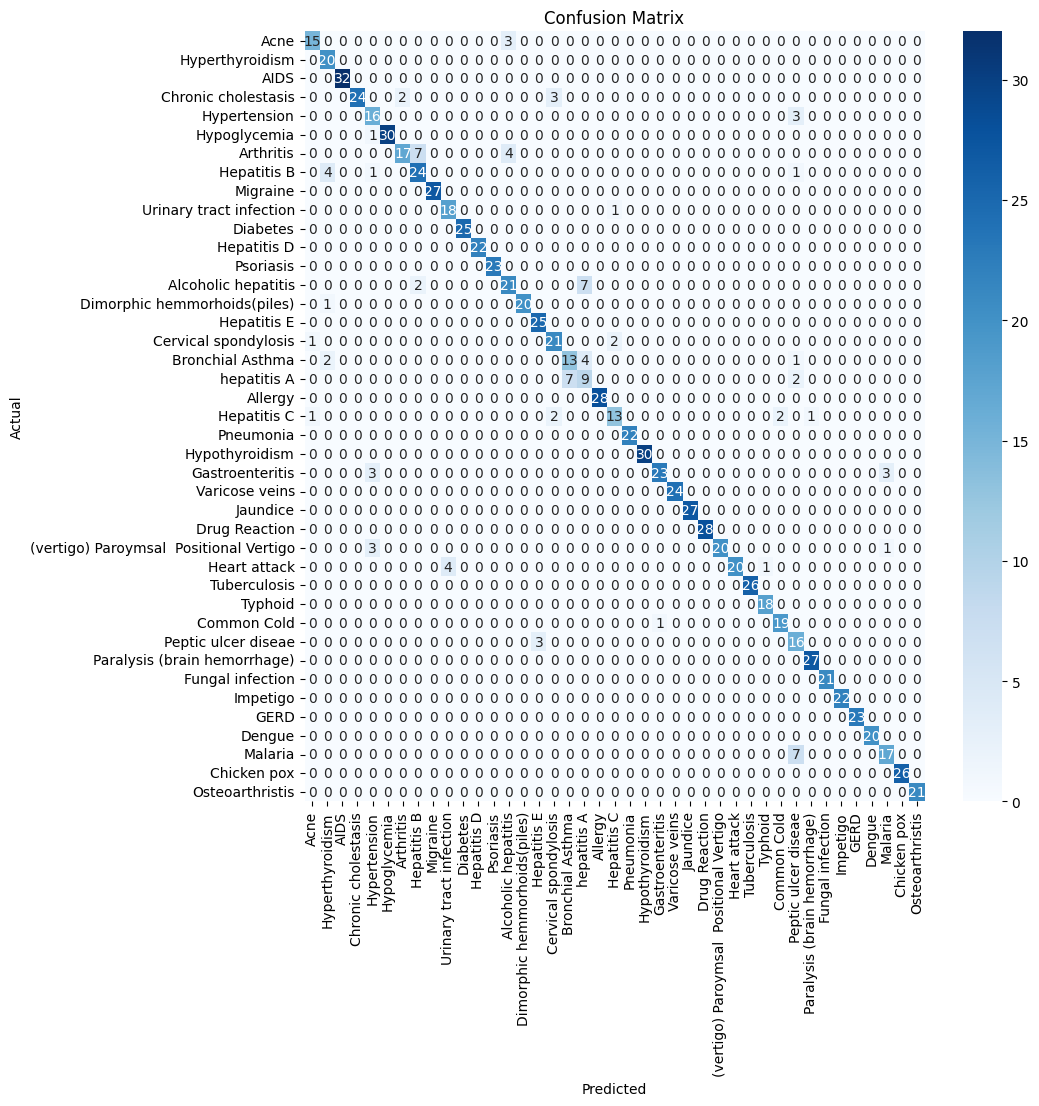

In [30]:
# Affichage de la matrice de confusion
def plot_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
# Affichage des résultats de la classification
def print_results(y_test, y_pred, labels):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, labels)
    
# Préparation des données
X = df.drop('Disease', axis=1)
y = df['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de classification
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Affichage des résultats
labels = df['Disease'].unique()
print_results(y_test, y_pred, labels)

c:\Users\Pascal.Ke\Desktop\detection_maladie\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pascal.Ke\Desktop\detection_maladie\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

LR: 0.905228 (0.012228)
SGD: 0.774629 (0.035858)
RF: 0.994410 (0.003735)
KNN: 0.990347 (0.005176)
DT: 0.994917 (0.003771)
NB: 0.868398 (0.016503)
SVM: 0.929884 (0.008541)
GB: 0.993902 (0.003255)
ET: 0.994917 (0.003771)
BC: 0.993902 (0.003255)
AB: 0.095028 (0.030355)
P: 0.631335 (0.060895)
RC: 0.606228 (0.039699)


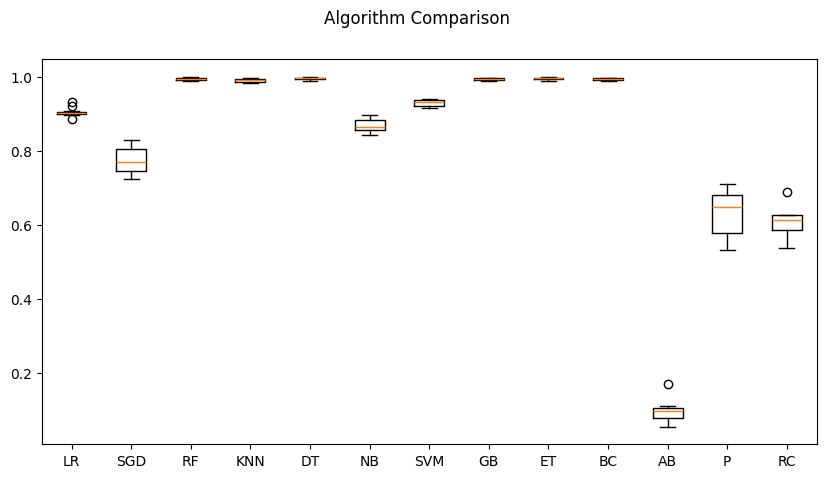

In [31]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

models = []
models.append(('LR', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('AB', AdaBoostClassifier(algorithm='SAMME')))
models.append(('P', Perceptron()))
models.append(('RC', RidgeClassifier()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Accuracy:  0.9959349593495935


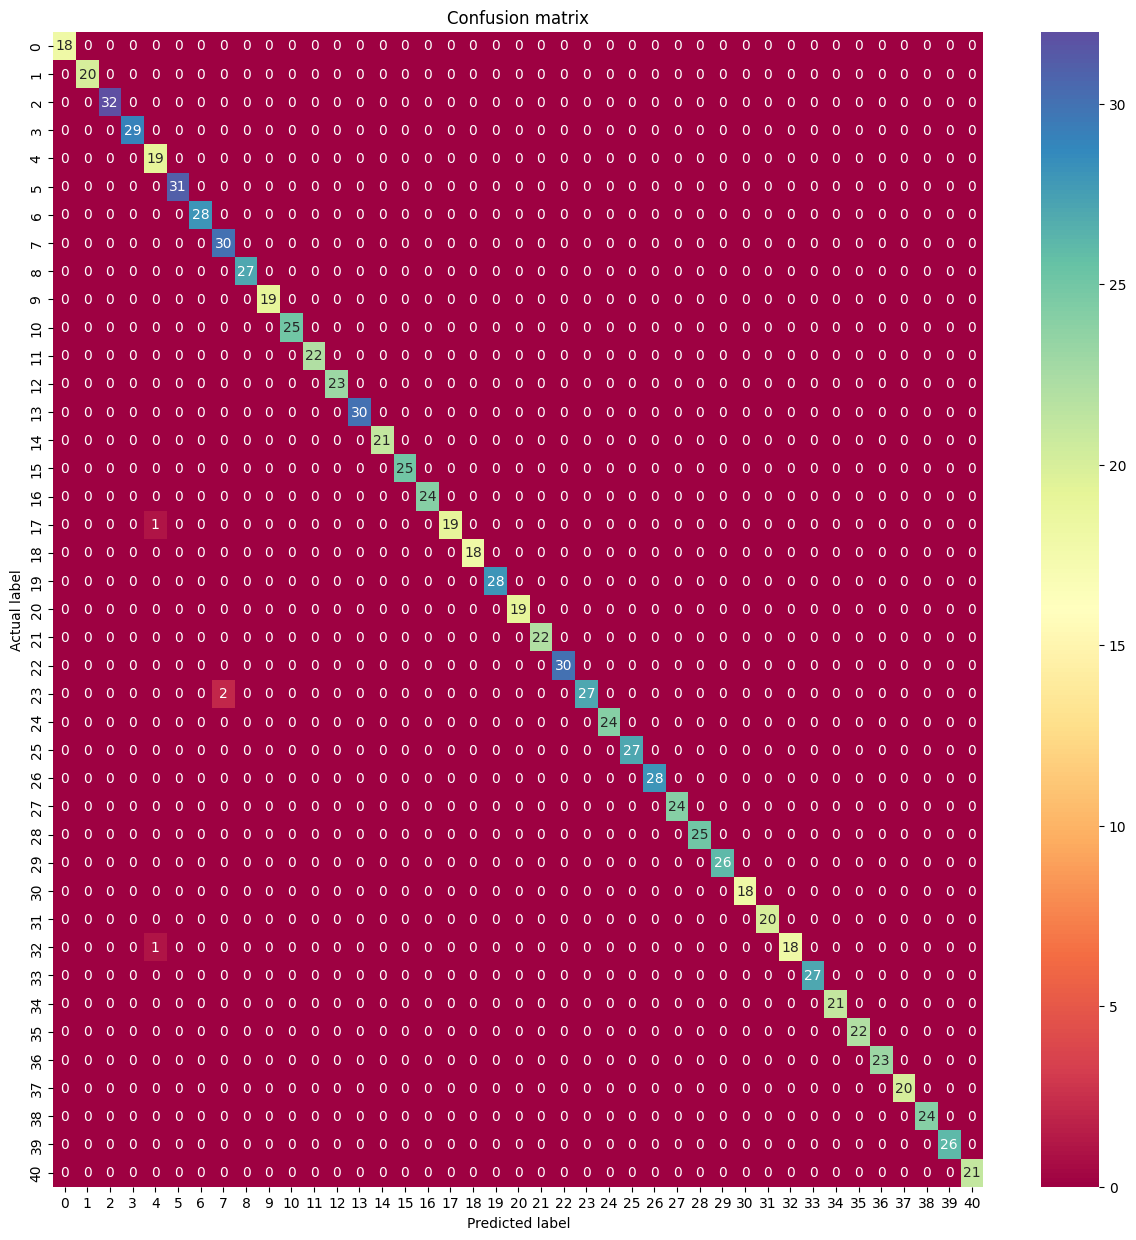

In [32]:
# Testing the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, predictions))

# Confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
# Classification report
print(metrics.classification_report(y_test, predictions))

# Save the model
import pickle

model = RandomForestClassifier()
model.fit(data, labels)

with open('../model/chatbox_random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)

df1.to_csv('../data/cleaned_symptom_severity.csv', index=False)

# Save the dataframe
df.to_csv('../data/cleaned_dataset.csv', index=False)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       0.90      1.00      0.95        19
                              Arthritis       1.00      1.00      1.00        31
                       Bronchial Asthma       1.00      1.00      1.00        28
                   Cervical spondylosis       0.94      1.00      0.97        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       1.00      1.00      1.00        19
                            Common Cold       1.00      1.00      1.00        25
                           

In [34]:
# Deux exemples de textes
text1 = "I've been feeling unwell lately with headaches and nausea."
text2 = "I have been experiencing headaches and feel very tired."

# Traiter les textes avec SpaCy
doc1 = nlp(text1)
doc2 = nlp(text2)

# Calcul de la similarité
similarity = doc1.similarity(doc2)
print(f"Similarité entre les deux textes : {similarity:.3f}")

# Obtenir les vecteurs pour deux mots
word1_vector = nlp("headache").vector
word2_vector = nlp("nausea").vector

# Calcul de la similarité cosine
cosine_similarity = np.dot(word1_vector, word2_vector) / (np.linalg.norm(word1_vector) * np.linalg.norm(word2_vector))
print(f"Similarité cosine entre 'headache' et 'nausea': {cosine_similarity:.3f}")

Similarité entre les deux textes : 0.919
Similarité cosine entre 'headache' et 'nausea': 0.706


In [35]:
#text = "I've been feeling unwell for the past week. It started with a mild fever, around 38°C, and some chills. Over the next couple of days, I developed a sore throat and a dry cough that seems to be getting worse. My throat feels scratchy, and it hurts when I swallow. I've also noticed a general sense of fatigue and muscle aches, especially in my back and legs. I haven't had much of an appetite and sometimes feel a bit nauseous, though I haven't vomited. My nose is slightly congested, but I'm not experiencing any shortness of breath. There's no rash or other skin changes, but I do have a slight headache that comes and goes."
text = "Hi doctor, for the past few days, I’ve been feeling really under the weather. It started with a sore throat, and then my nose got all stuffy and runny. I’ve been sneezing a lot too, and my head feels heavy, like there’s a lot of pressure around my sinuses. I’ve also had a bit of a cough, and my voice sounds hoarse. I don’t have a fever, but I’ve been feeling really tired and sluggish. My body aches, especially around my neck and shoulders. I don’t think it’s anything serious, just a really annoying cold, but it’s making it hard to focus on work and sleep at night. Is there anything I can do to feel better faster?"
text = process_text(text)
print(text)

sore throat nose cough fever ache


## Recherche des mots similaires avec nos symtomes connus et traités

In [36]:
# Tableau des symptômes connus avec leurs poids correspondants
# known_symptoms_array = df1['Symptom']
# symptoms_weights = df1['weight']
# symptoms_array = []
# weights_array = []
# unique_symptoms = set()
# target_count = 17  # Nombre cible de symptômes
# similarity_threshold = 0.9  # Seuil initial de similarité
# word_symptom_mapping = {}  # Dictionnaire pour stocker les associations
# 
# def search_word_similarity(word):
#     max_similarity = 0
#     max_symptom = ''
#     max_weight = 0
#     for i, symptom in enumerate(known_symptoms_array):
#         similarity = nlp(word).similarity(nlp(symptom))
#         if similarity > max_similarity:
#             max_similarity = similarity
#             max_symptom = symptom
#             max_weight = symptoms_weights[i]
#     return max_symptom, max_similarity, max_weight
# 
# # Fonction pour trouver les symptômes et leurs poids associés jusqu'à atteindre le compte cible
# def find_symptoms(text, threshold):
#     new_symptoms = []
#     new_weights = []
#     for word in text.split():
#         if word in word_symptom_mapping:
#             continue  # Ignorer les mots déjà traités
# 
#         # Rechercher la similarité avec les symptômes connus
#         symptom, similarity, weight = search_word_similarity(word)
#         # Si la similarité est supérieure au seuil et le symptôme est unique
#         if similarity >= threshold and symptom not in unique_symptoms:
#             unique_symptoms.add(symptom)
#             new_symptoms.append(symptom)
#             new_weights.append(weight)
#             word_symptom_mapping[word] = weight  # Enregistrer le poids associé
#     return new_symptoms, new_weights
# 
# # Boucle pour ajuster le seuil de similarité jusqu'à obtenir suffisamment de symptômes
# while len(symptoms_array) < target_count and similarity_threshold > 0:
#     new_symptoms, new_weights = find_symptoms(text, similarity_threshold)
#     symptoms_array.extend(new_symptoms)
#     weights_array.extend(new_weights)
# 
#     # Synchroniser les poids avec les symptômes après avoir éliminé les doublons
#     symptoms_weights_mapping = dict(zip(symptoms_array, weights_array))
#     symptoms_array = list(symptoms_weights_mapping.keys())
#     weights_array = list(symptoms_weights_mapping.values())
# 
#     # Limiter immédiatement le nombre de symptômes à target_count si atteint
#     if len(symptoms_array) >= target_count:
#         symptoms_array = symptoms_array[:target_count]  # S'assurer de ne pas dépasser le nombre cible
#         weights_array = weights_array[:target_count]  # S'assurer de ne pas dépasser le nombre cible
#         break  # Sortir de la boucle si la cible est atteinte
# 
#     similarity_threshold -= 0.05  # Réduire le seuil de similarité
# 
# # Afficher les résultats avec les poids associés
# print("Symptômes extraits avec les poids associés:")
# for symptom, weight in zip(symptoms_array, weights_array):
#     print(f"Symptom: {symptom}, Weight: {weight}")
# 
# print("\nAssociations des mots avec les poids correspondants:")
# for word, weight in word_symptom_mapping.items():
#     print(f"Word: {word}, Weight: {weight}")


In [37]:
import numpy as np

# Tableau des symptômes connus avec leurs poids correspondants
known_symptoms_array = df1['Symptom']
symptoms_weights = df1['weight']
symptoms_array = []
weights_array = []
unique_symptoms = set()
target_count = 17  # Nombre cible de symptômes
similarity_threshold = 0.9  # Seuil initial de similarité
word_symptom_mapping = {}  # Dictionnaire pour stocker les associations

# Debugging: Vérifier la taille et l'intégrité des données d'entrée
print(f"Nombre de symptômes connus: {len(known_symptoms_array)}")
print(f"Données de texte: {text}")

def search_word_similarity(word):
    max_similarity = 0
    max_symptom = ''
    max_weight = 0
    for i, symptom in enumerate(known_symptoms_array):
        try:
            similarity = nlp(word).similarity(nlp(symptom))
        except Exception as e:
            print(f"Erreur de similarité pour le mot '{word}' et le symptôme '{symptom}': {e}")
            continue
        if similarity > max_similarity:
            max_similarity = similarity
            max_symptom = symptom
            max_weight = symptoms_weights[i]
    return max_symptom, max_similarity, max_weight

def find_symptoms(text, threshold):
    new_symptoms = []
    new_weights = []
    for word in text.split():
        if word in word_symptom_mapping:
            continue  # Ignorer les mots déjà traités

        # Rechercher la similarité avec les symptômes connus
        symptom, similarity, weight = search_word_similarity(word)
        # Debugging: Affichage des similarités
        print(f"Word: {word}, Similarity: {similarity}, Symptom: {symptom}, Weight: {weight}")

        # Si la similarité est supérieure au seuil et le symptôme est unique
        if similarity >= threshold and symptom not in unique_symptoms:
            unique_symptoms.add(symptom)
            new_symptoms.append(symptom)
            new_weights.append(weight)
            word_symptom_mapping[word] = weight  # Enregistrer le poids associé
    return new_symptoms, new_weights

# Boucle pour ajuster le seuil de similarité jusqu'à obtenir suffisamment de symptômes
while len(symptoms_array) < target_count and similarity_threshold > 0:
    new_symptoms, new_weights = find_symptoms(text, similarity_threshold)
    symptoms_array.extend(new_symptoms)
    weights_array.extend(new_weights)

    # Synchroniser les poids avec les symptômes après avoir éliminé les doublons
    symptoms_weights_mapping = dict(zip(symptoms_array, weights_array))
    symptoms_array = list(symptoms_weights_mapping.keys())
    weights_array = list(symptoms_weights_mapping.values())

    # Limiter immédiatement le nombre de symptômes à target_count si atteint
    if len(symptoms_array) >= target_count:
        symptoms_array = symptoms_array[:target_count]
        weights_array = weights_array[:target_count]
        break  # Sortir de la boucle si la cible est atteinte

    similarity_threshold -= 0.05  # Réduire le seuil de similarité

# Afficher les résultats avec les poids associés
print("Symptômes extraits avec les poids associés:")
for symptom, weight in zip(symptoms_array, weights_array):
    print(f"Symptom: {symptom}, Weight: {weight}")

print("\nAssociations des mots avec les poids correspondants:")
for word, weight in word_symptom_mapping.items():
    print(f"Word: {word}, Weight: {weight}")

Nombre de symptômes connus: 133
Données de texte: sore throat nose cough fever ache


C:\Users\Pascal.Ke\AppData\Local\Temp\ipykernel_16948\2704694206.py:23: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = nlp(word).similarity(nlp(symptom))


Word: sore, Similarity: 0.9999999589957262, Symptom: swollen extremeties, Weight: 5
Word: throat, Similarity: 0.8066844562216711, Symptom: throat irritation, Weight: 4
Word: nose, Similarity: 0.9001645608370988, Symptom: runny nose, Weight: 5
Word: cough, Similarity: 1.0, Symptom: cough, Weight: 4
Word: fever, Similarity: 0.860784327968237, Symptom: mild fever, Weight: 5
Word: ache, Similarity: 0.944704764505455, Symptom: abdominal pain, Weight: 4
Word: throat, Similarity: 0.8066844562216711, Symptom: throat irritation, Weight: 4
Word: fever, Similarity: 0.860784327968237, Symptom: mild fever, Weight: 5
Word: throat, Similarity: 0.8066844562216711, Symptom: throat irritation, Weight: 4
Symptômes extraits avec les poids associés:
Symptom: swollen extremeties, Weight: 5
Symptom: runny nose, Weight: 5
Symptom: cough, Weight: 4
Symptom: abdominal pain, Weight: 4
Symptom: mild fever, Weight: 5
Symptom: throat irritation, Weight: 4

Associations des mots avec les poids correspondants:
Word: 

In [38]:
# import numpy as np
# 
# # Tableau des symptômes connus avec leurs poids correspondants
# known_symptoms_array = df1['Symptom']
# symptoms_weights = df1['weight']
# symptoms_array = []
# weights_array = []
# unique_symptoms = set()
# target_count = 17  # Nombre cible de symptômes
# initial_similarity_threshold = 0.9  # Seuil initial de similarité
# min_similarity_threshold = 0.0  # Seuil minimum de similarité
# word_symptom_mapping = {}  # Dictionnaire pour stocker les associations
# 
# # Debugging: Vérifier la taille et l'intégrité des données d'entrée
# print(f"Nombre de symptômes connus: {len(known_symptoms_array)}")
# print(f"Données de texte: {text}")
# 
# def search_word_similarity(word):
#     max_similarity = 0
#     max_symptom = ''
#     max_weight = 0
#     for i, symptom in enumerate(known_symptoms_array):
#         try:
#             similarity = nlp(word).similarity(nlp(symptom))
#         except Exception as e:
#             print(f"Erreur de similarité pour le mot '{word}' et le symptôme '{symptom}': {e}")
#             continue
#         if similarity > max_similarity:
#             max_similarity = similarity
#             max_symptom = symptom
#             max_weight = symptoms_weights[i]
#     return max_symptom, max_similarity, max_weight
# 
# def find_symptoms(text, threshold):
#     new_symptoms = []
#     new_weights = []
#     for word in text.split():
#         if word in word_symptom_mapping:
#             continue  # Ignorer les mots déjà traités
# 
#         # Rechercher la similarité avec les symptômes connus
#         symptom, similarity, weight = search_word_similarity(word)
#         # Debugging: Affichage des similarités
#         print(f"Word: {word}, Similarity: {similarity}, Symptom: {symptom}, Weight: {weight}")
# 
#         # Si la similarité est supérieure ou égale au seuil et le symptôme est unique
#         if similarity >= threshold and symptom not in unique_symptoms:
#             unique_symptoms.add(symptom)
#             new_symptoms.append(symptom)
#             new_weights.append(weight)
#             word_symptom_mapping[word] = weight  # Enregistrer le poids associé
#     return new_symptoms, new_weights
# 
# # Ajuster le seuil une seule fois et chercher tous les symptômes
# new_symptoms, new_weights = find_symptoms(text, initial_similarity_threshold)
# symptoms_array.extend(new_symptoms)
# weights_array.extend(new_weights)
# 
# # Synchroniser les poids avec les symptômes après avoir éliminé les doublons
# symptoms_weights_mapping = dict(zip(symptoms_array, weights_array))
# symptoms_array = list(symptoms_weights_mapping.keys())
# weights_array = list(symptoms_weights_mapping.values())
# 
# # Limiter le nombre de symptômes à target_count si atteint
# if len(symptoms_array) > target_count:
#     symptoms_array = symptoms_array[:target_count]
#     weights_array = weights_array[:target_count]
# 
# # Afficher les résultats avec les poids associés
# print("Symptômes extraits avec les poids associés:")
# for symptom, weight in zip(symptoms_array, weights_array):
#     print(f"Symptom: {symptom}, Weight: {weight}")
# 
# print("\nAssociations des mots avec les poids correspondants:")
# for word, weight in word_symptom_mapping.items():
#     print(f"Word: {word}, Weight: {weight}")


In [39]:
print(weights_array)
print(len(weights_array))

# Afficher les poids sur une ligne
word_symptom_mapping_weights_array = np.array(list(word_symptom_mapping.values()))
# Affichage des poids sous forme d'array
print(word_symptom_mapping_weights_array)
print(len(word_symptom_mapping))

[5, 5, 4, 4, 5, 4]
6
[5 5 4 4 5 4]
6


[5. 5. 4. 4. 5. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
17
Prédiction de la maladie: Peptic ulcer diseae
Autres maladies possibles:
Acne
Hyperthyroidism
AIDS
Chronic cholestasis
Hypertension
Hypoglycemia
Arthritis
Hepatitis B
Migraine
Urinary tract infection
Diabetes
Hepatitis D
Psoriasis
Alcoholic hepatitis
Dimorphic hemmorhoids(piles)
Hepatitis E
Cervical spondylosis
Bronchial Asthma
hepatitis A
Allergy
Hepatitis C
Pneumonia
Hypothyroidism
Gastroenteritis
Varicose veins
Jaundice
Drug Reaction
(vertigo) Paroymsal  Positional Vertigo
Heart attack
Tuberculosis
Typhoid
Common Cold
Paralysis (brain hemorrhage)
Fungal infection
Impetigo
GERD
Dengue
Malaria
Chicken pox
Osteoarthristis


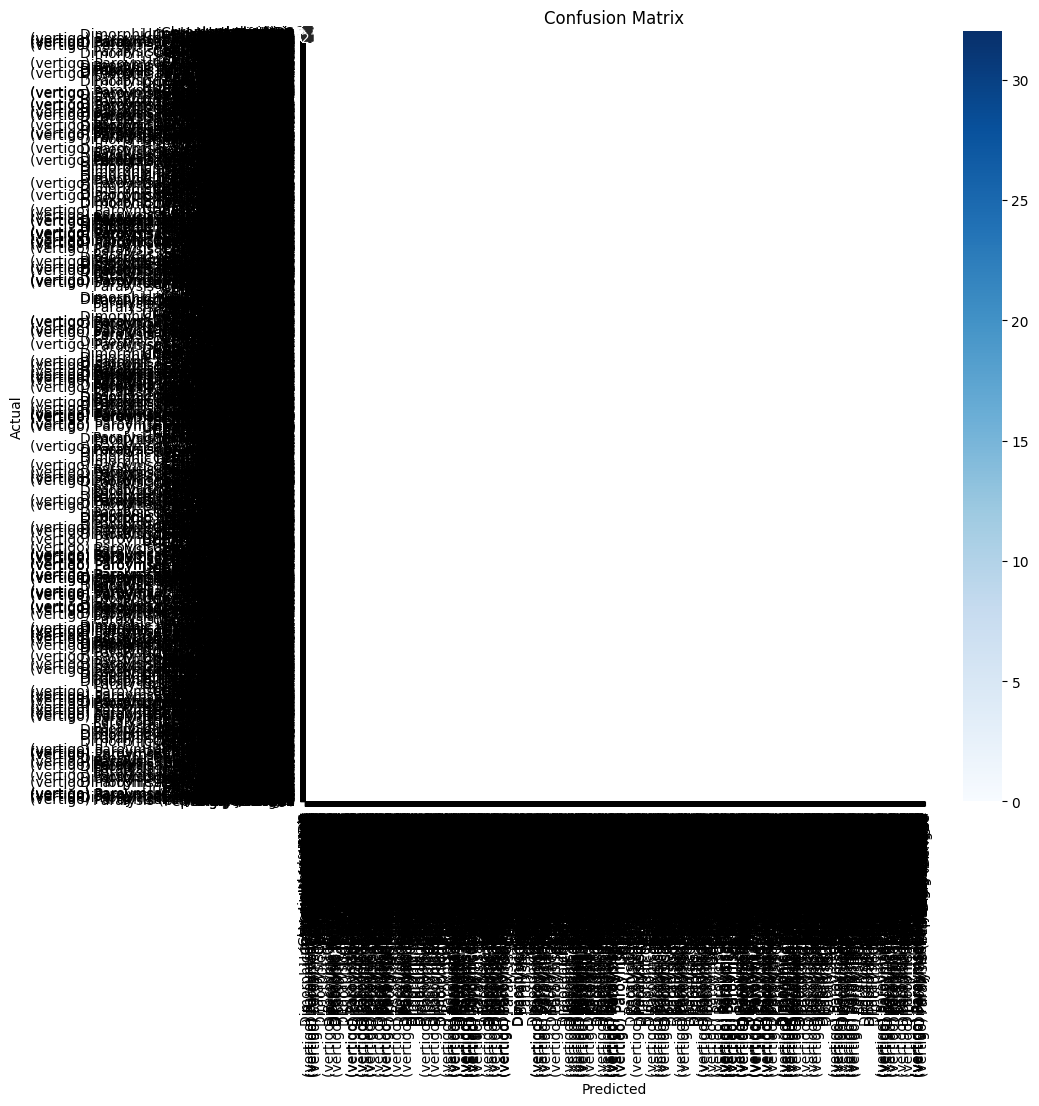

Accuracy: 0.907520325203252
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.88      0.83      0.86        18
                                   AIDS       0.74      1.00      0.85        20
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      0.83      0.91        29
                                Allergy       0.67      0.84      0.74        19
                              Arthritis       1.00      0.97      0.98        31
                       Bronchial Asthma       0.89      0.61      0.72        28
                   Cervical spondylosis       0.73      0.80      0.76        30
                            Chicken pox       1.00      1.00      1.00        27
                    Chronic cholestasis       0.82      0.95      0.88        19
                            Common Cold       1.00      1.00      1.00        25

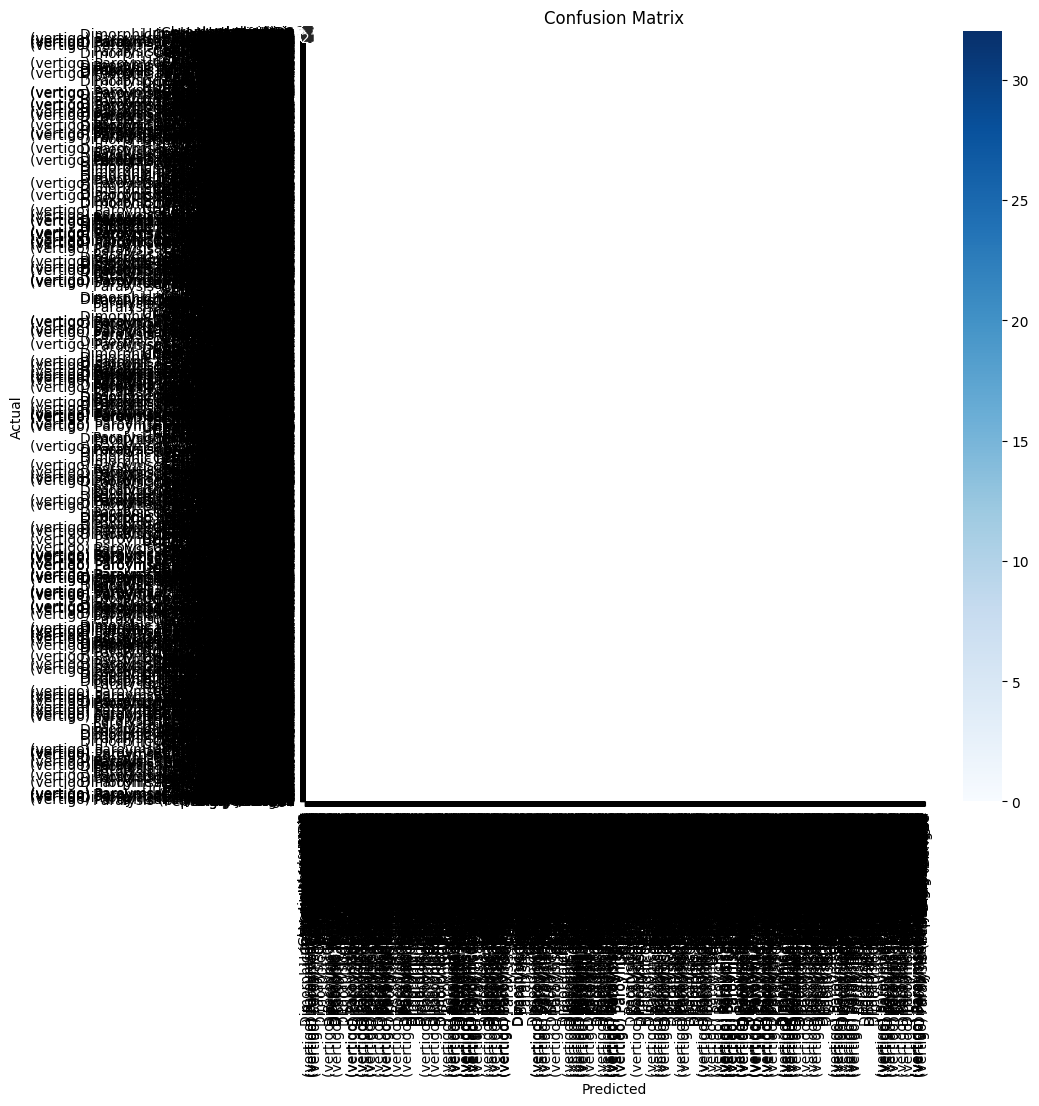

In [40]:
# ajouter des zéros pour les poids manquants
zero_padding = np.zeros(target_count - len(word_symptom_mapping))
word_symptom_mapping_weights_array = np.concatenate([word_symptom_mapping_weights_array, zero_padding])
print(word_symptom_mapping_weights_array)
print(len(word_symptom_mapping_weights_array))

# Prédiction de la maladie
disease_predictions = model.predict([word_symptom_mapping_weights_array])
print(f"Prédiction de la maladie: {disease_predictions[0]}")

# Affichage des 5 autres maladies possibles
print("Autres maladies possibles:")
other_diseases = [disease for disease in df['Disease'].unique() if disease != disease_predictions[0]]
for disease in other_diseases:
    print(disease)


# Afficher la matrice de confusion
plot_confusion_matrix(y_test, y_pred, labels)

# Afficher les résultats de la classification
print_results(y_test, y_pred, labels)